In [1]:
%matplotlib inline
import networkx as nx
import math
from matplotlib import pyplot as plt
from collections import deque
from heapq import heappop, heappush
from random import *
import numpy as np

In [2]:
## A* algorithm pre-coded from base algorithm (can implement a call to this later)

def heuristic(a, b):
    # Euclidean distance
    (x1, y1) = a
    (x2, y2) = b
    return math.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2) 

# simpler alternative
def astar(graph, start, goal):
    q = [] 
    q.append((0, [start], start)) # define queue to contain a tuple of data structs as follows: (cost to node, path to node, node)
    
    visited = [] # list to track all visited nodes

    while len(q) > 0:
        cost, path, current = q.pop()
        visited.append(current)
    
        if current == goal:
            return visited

        for neighbor in graph.neighbors(current):
            if neighbor not in visited:
                # append new values of cost, path and node to list
                q.append((cost + graph[current][neighbor]['weight'] + heuristic(graph.nodes[start]['position'], graph.nodes[neighbor]['position']),
                     path + [neighbor], neighbor))

    return None # no path found



# Dijkstra's algorithm ( A* without the heuristic function )
def dijkstra(graph, start, goal):
    q = [] 
    q.append((0, [start], start)) # define queue to contain a tuple of data structs as follows: (cost to node, path to node, node)
    
    visited = [] # list to track all visited nodes

    while len(q) > 0:
        cost, path, current = q.pop()
        visited.append(current)
    
        if current == goal:
            return visited

        for neighbor in graph.neighbors(current):
            if neighbor not in visited:
                # append new values of cost, path and node to list
                q.append((cost + graph[current][neighbor]['weight'],
                     path + [neighbor], neighbor))

    return None # no path found


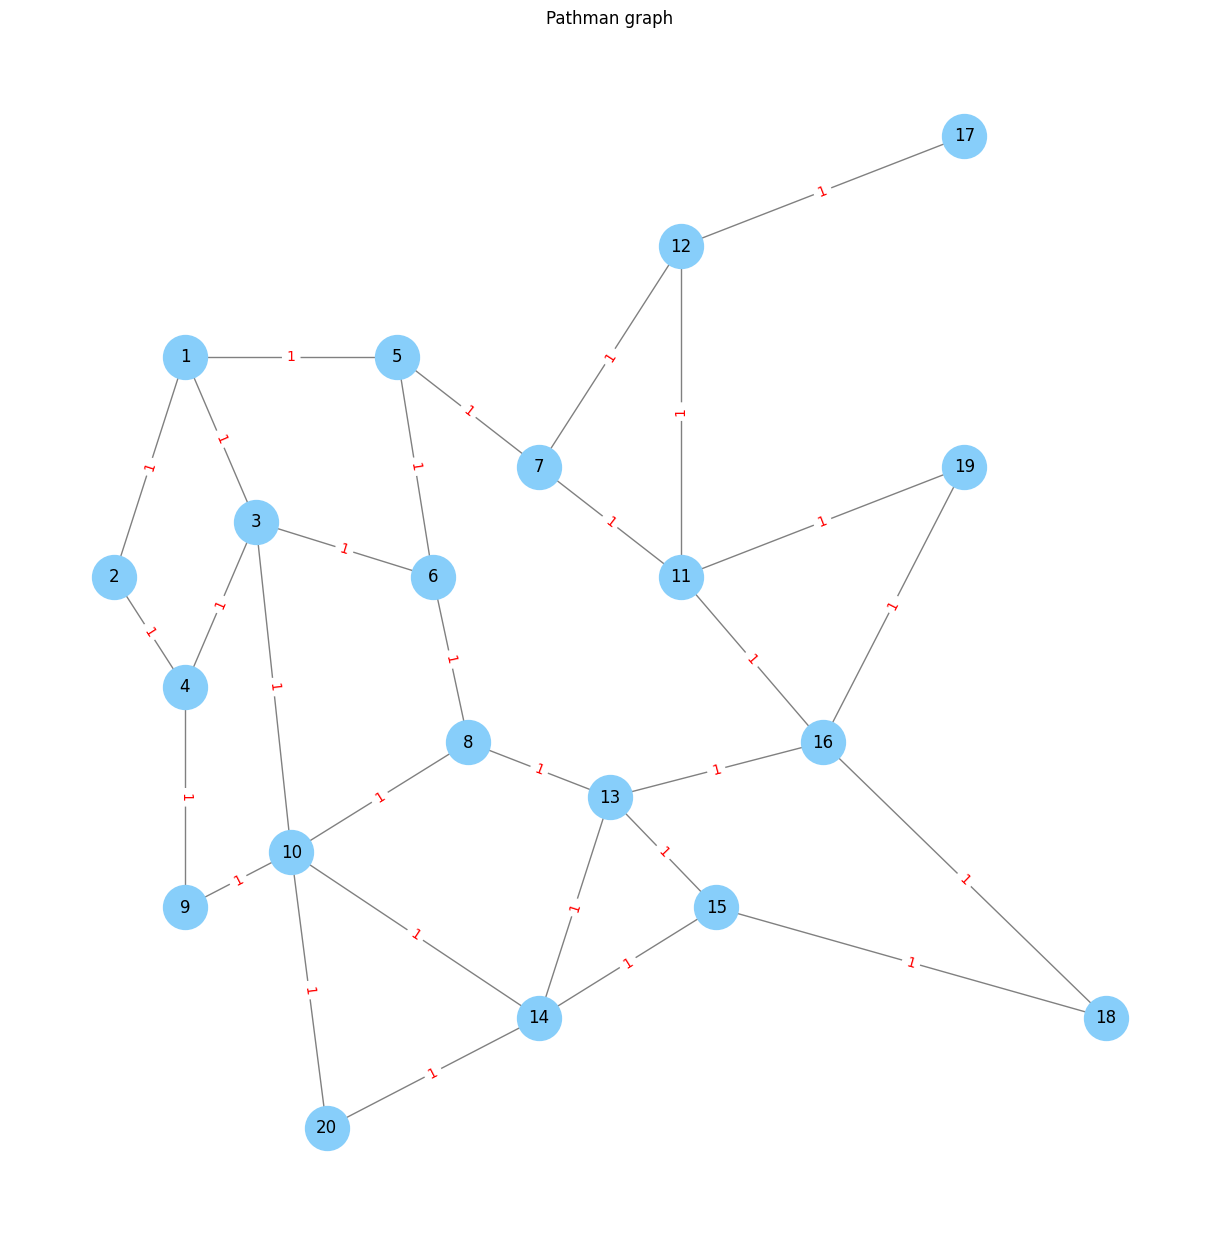

In [3]:
# Create Graph
graph = nx.Graph()

# Define edges with weights
edges = [
    ('1', '2', 1), ('1', '3', 1), ('1', '5', 1),
    ('2', '4', 1), 
    ('3', '4', 1), ('3', '10', 1), ('3', '6', 1),
    ('4', '9', 1),
    ('5', '6', 1), ('5', '7', 1),
    ('6', '8', 1), 
    ('7', '11', 1), ('7', '12', 1),
    ('8', '10', 1), ('8', '13', 1),
    ('9', '10', 1),
    ('10', '20', 1), ('10', '14', 1),
    ('11', '16', 1), ('11', '16', 1), ('11', '19', 1), 
    ('12', '11', 1), ('12', '17', 1),
    ('13', '14', 1), ('13', '15', 1), ('13', '16', 1),
    ('14', '15', 1), ('14', '20', 1),  
    ('15', '18', 1), 
    ('16', '18', 1), ('16', '19', 1),
        
]

# Add edges with weights
graph.add_weighted_edges_from(edges)

# Define node positions for Euclidean heuristic
positions = {
    '1': (1.5, 10), '2': (1, 8), '3': (2, 8.5), '4': (1.5, 7), '5': (3, 10), '6': (3.25, 8), '7': (4, 9),
    '8': (3.5, 6.5), '9': (1.5, 5), '10': (2.25, 5.5), '11': (5, 8), '12': (5, 11), '13': (4.5, 6), '14': (4, 4),
    '15': (5.25, 5), '16': (6, 6.5), '17': (7, 12), '18': (8, 4), '19': (7, 9), '20': (2.5, 3),
}

nx.set_node_attributes(graph, positions, "position")

# Draw graph
plt.figure(figsize=(12, 12))
pos = positions  # Use predefined positions for nodes
nx.draw(graph, pos, with_labels=True, node_color="lightskyblue", edge_color="gray", node_size=1000, font_size=12)
edge_labels = nx.get_edge_attributes(graph, "weight")
nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_size=10, font_color="red")
plt.title("Pathman graph")
plt.show()

In [4]:
# set game rules and necessary parameters
game_stops_at = 5 # stopping condition --> after goal is reached that amount of time
 
goal_node = '1' # set starting node as 1, updates in loop when goal is reached
counter = 0 

while counter < game_stops_at:
    start_node = goal_node 
    goal_node = str(randint(5,20)) # randomly assign goal node --> convert to string to work with algo
    print(f"The goal is now: {goal_node}")
    
    # call astar algo
    path = astar(graph, start_node, goal_node)

    print("Shortest Path to goal node Found:", path)
    
    counter += 1 # update counter

The goal is now: 11
Shortest Path to goal node Found: ['1', '5', '7', '12', '17', '11']
The goal is now: 6
Shortest Path to goal node Found: ['11', '12', '17', '7', '5', '6']
The goal is now: 10
Shortest Path to goal node Found: ['6', '8', '13', '16', '19', '11', '12', '17', '7', '5', '1', '3', '10']
The goal is now: 14
Shortest Path to goal node Found: ['10', '14']
The goal is now: 14
Shortest Path to goal node Found: ['14']


In [5]:
def make_connection(index, array): # function to call connection generation
    connect_to = randint(-5, 10) # randomise connection node number throughout iteration --> from 5 before to 10 ahead (-5, 10) --> nodes can connect backwards too
    diff = index - connect_to 

    connection = index + connect_to
    
    # avoid negative index
    if connection < 0:
        connection = abs(connection)
    elif connection == 0:
        connection += 1
    # avoid out of range index
    if connection > len(array) - 1:
        connection = len(array) - 1
    # avoid connection to self
    if connection == index and connection != len(array) - 1:
        connection += 1


    return connection

In [9]:
def generate_graph(nodes): # function to automate graph creation --> input: number of nodes

    # define nodes in range of number defined
    array_of_nodes = np.linspace(1, nodes, num=nodes)
    array_of_nodes = [str(int(i)) for i in array_of_nodes]
    
    # Create Graph
    graph = nx.Graph()


    # Automatic graph generation and assignment of connections and weights

    # Define logic of connections between nodes --> (upper and lower bound for number of connections allowed to any one node at a given time)
    # min: 1 connection, max: 4
    min_connect = 1
    max_connect = 2
    
    edges = []
    
    for i in range(0, len(array_of_nodes)-1):

        # randomise choice of number of connections for each node between min and max limits defines
        num_connect = randint(1,4)

        for j in range(num_connect):
            connection = make_connection(i, array_of_nodes)
            # add connections
            edges.append((array_of_nodes[i], array_of_nodes[connection], randint(1,10)))
            
    print(edges)

    # Add edges with weights
    graph.add_weighted_edges_from(edges)    

    # coordinate limits for x and y axes
    x_max = nodes
    y_max = nodes

    # Define node positions for Euclidean heuristic
    # define position dictionary --> each node with a randomly assigned position (x, y)
    positions = {}

    for i in array_of_nodes:
        positions[i] = (randint(0, x_max), randint(0, y_max))

    print(positions)
    
    nx.set_node_attributes(graph, positions, "position")
    
    # Draw graphs
    plt.figure(figsize=(x_max, y_max))
    pos = positions  # Use predefined positions for nodes
    nx.draw(graph, pos, with_labels=True, node_color="lightskyblue", edge_color="gray", node_size=1000, font_size=12)
    edge_labels = nx.get_edge_attributes(graph, "weight")
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_size=10, font_color="red")
    plt.title("Pathman graph")
    plt.show()

[('1', '4', 5), ('1', '6', 2), ('2', '5', 3), ('2', '4', 5), ('2', '6', 3), ('3', '7', 10), ('3', '8', 4), ('3', '7', 6), ('4', '3', 4), ('4', '8', 8), ('5', '2', 1), ('6', '3', 2), ('7', '2', 9), ('7', '5', 6), ('7', '11', 2), ('7', '17', 4), ('8', '15', 1), ('9', '13', 1), ('9', '13', 2), ('10', '8', 5), ('10', '16', 5), ('10', '19', 4), ('10', '8', 5), ('11', '10', 10), ('11', '9', 4), ('11', '16', 10), ('12', '8', 9), ('13', '21', 10), ('13', '20', 5), ('13', '23', 10), ('13', '21', 7), ('14', '10', 1), ('14', '15', 8), ('14', '12', 6), ('15', '21', 7), ('16', '19', 4), ('16', '15', 7), ('17', '19', 7), ('17', '14', 9), ('18', '24', 9), ('18', '24', 2), ('18', '24', 10), ('18', '15', 6), ('19', '17', 5), ('19', '18', 4), ('19', '15', 7), ('20', '22', 3), ('20', '26', 9), ('21', '25', 6), ('21', '23', 1), ('21', '29', 10), ('22', '24', 1), ('22', '30', 10), ('22', '29', 1), ('23', '22', 2), ('24', '30', 1), ('24', '23', 3), ('24', '33', 8), ('24', '34', 4), ('25', '24', 4), ('25', '

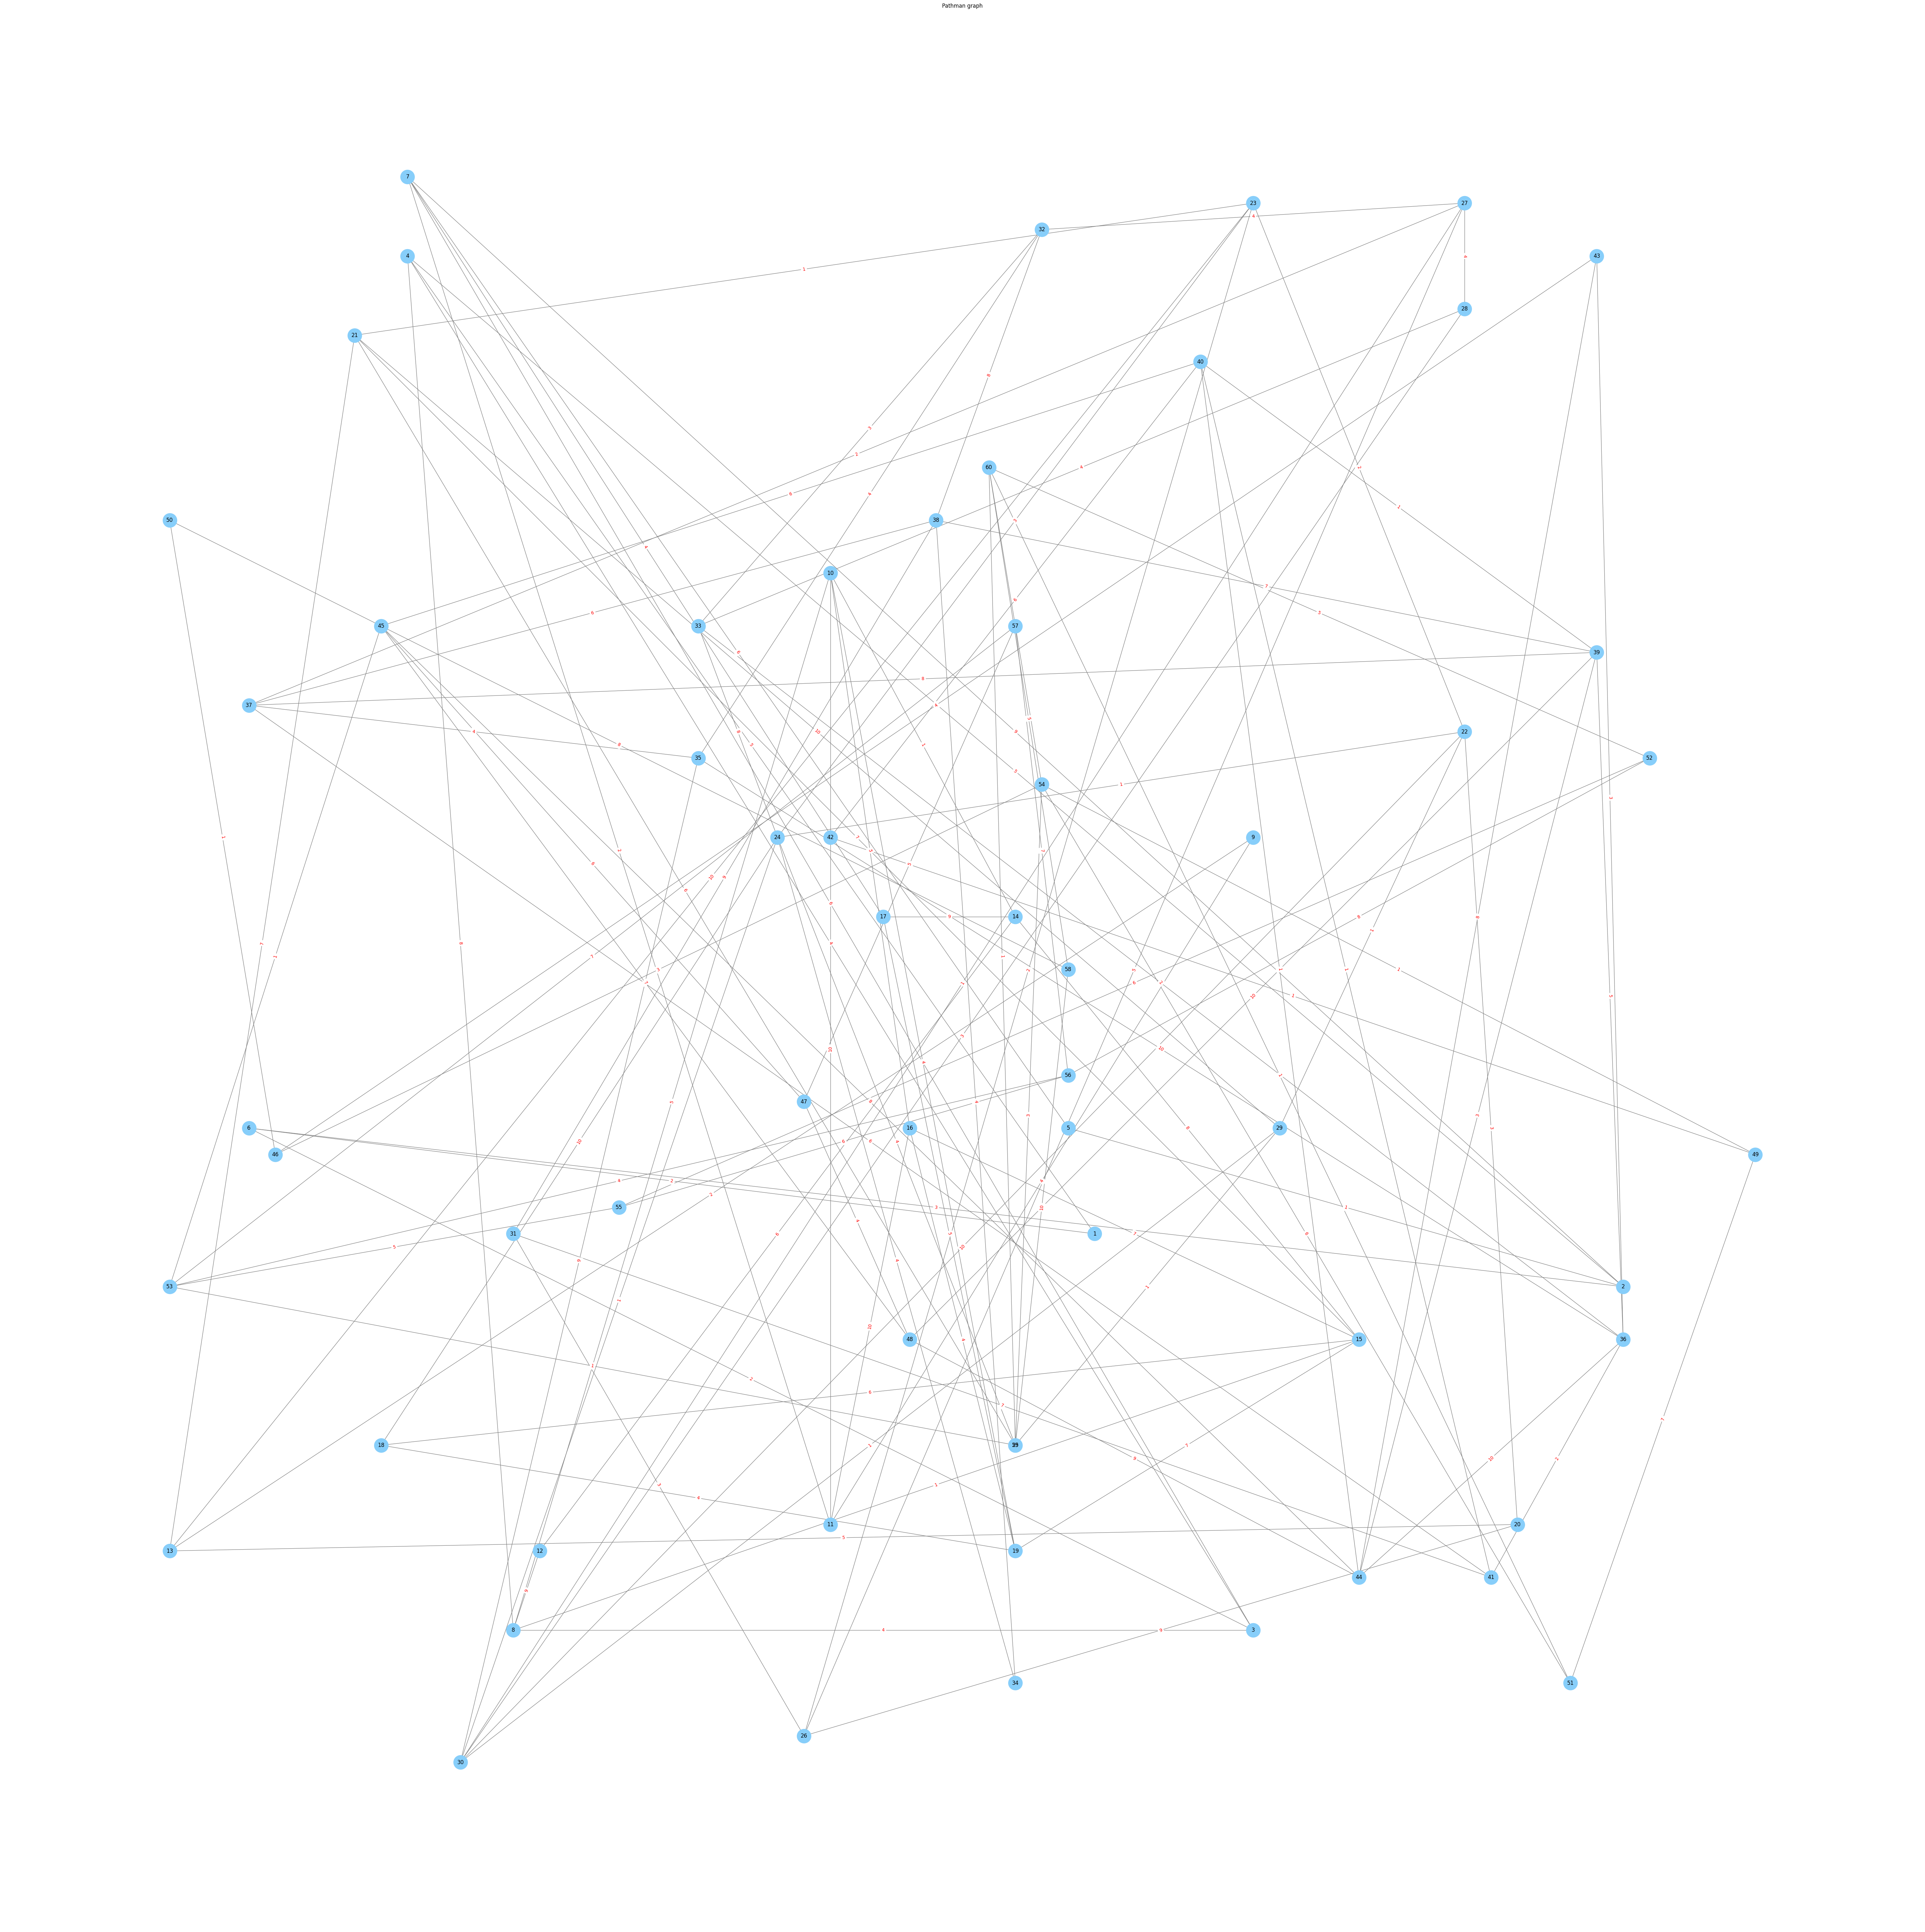

In [11]:
generate_graph(60)